# **Preprocessing**

In [1]:
# to import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to ensure plots are displayed in the notebook:
%matplotlib inline

In [2]:
# to load the dataset:
file_path = r'C:\Users\suvid\Downloads\myexcel.xlsx'  # Use raw string (r) to handle backslashes
data = pd.ExcelFile(file_path)

# to load the sheet into a DataFrame:
df = data.parse('myexcel.csv')  # Replace with the exact sheet name if needed

# to display the first few rows of the dataset:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [5]:
# to replace "Height" column with random numbers between 150 and 180:
df['Height'] = np.random.randint(150, 181, size=len(df))

# to verify the changes:
df['Height'].head()

0    179
1    158
2    152
3    159
4    166
Name: Height, dtype: int32

In [7]:
# Distribution across teams:
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100

print(team_percentage)

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

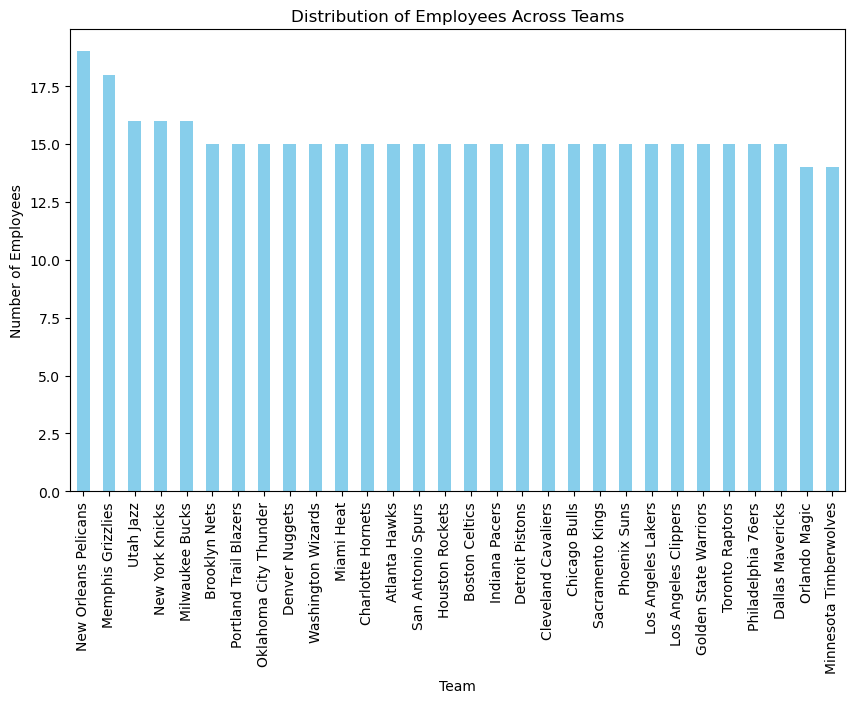

In [9]:
# Visualization:
plt.figure(figsize=(10, 6))
team_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.show()

In [11]:
# Segregation by position:
position_distribution = df['Position'].value_counts()
print(position_distribution)

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


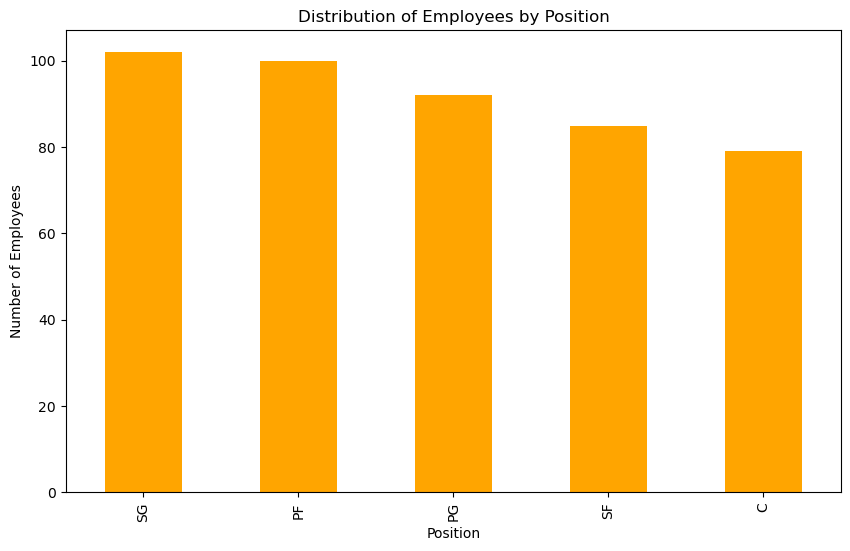

In [13]:
# Visualisation:
plt.figure(figsize=(10, 6))
position_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.show()

Age Group
18-25    200
26-30    167
31-35     68
36-40     23
41-50      0
Name: count, dtype: int64


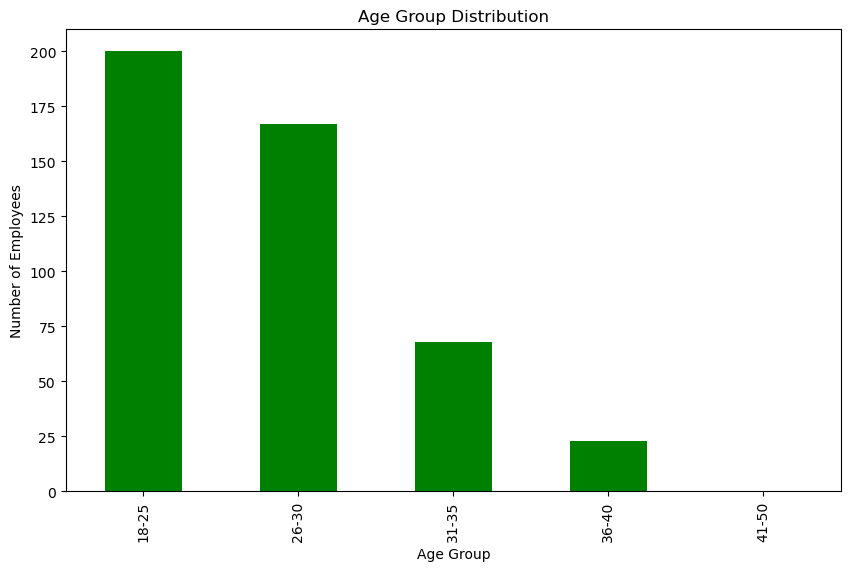

In [15]:
# Bin ages into groups:
age_bins = [18, 25, 30, 35, 40, 50]
labels = ['18-25', '26-30', '31-35', '36-40', '41-50']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=labels)

# to count employees by age group:
age_group_distribution = df['Age Group'].value_counts()
print(age_group_distribution)

# Plot the distribution:
plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar', color='green')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

In [17]:
# Total salary by team:
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
print(team_salary)

Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota Timberwolves     59709697.0
Boston 

In [19]:
# Total salary by position:
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)
print(position_salary)

# Display the team with the highest salary expenditure
print("Team with the highest salary expenditure:")
print(team_salary.head(1))

# Display the position with the highest salary expenditure
print("Position with the highest salary expenditure:")
print(position_salary.head(1))

Position
C     466377332.0
PG    446848971.0
PF    442560850.0
SF    408020976.0
SG    396976258.0
Name: Salary, dtype: float64
Team with the highest salary expenditure:
Team
Cleveland Cavaliers    106988689.0
Name: Salary, dtype: float64
Position with the highest salary expenditure:
Position
C    466377332.0
Name: Salary, dtype: float64


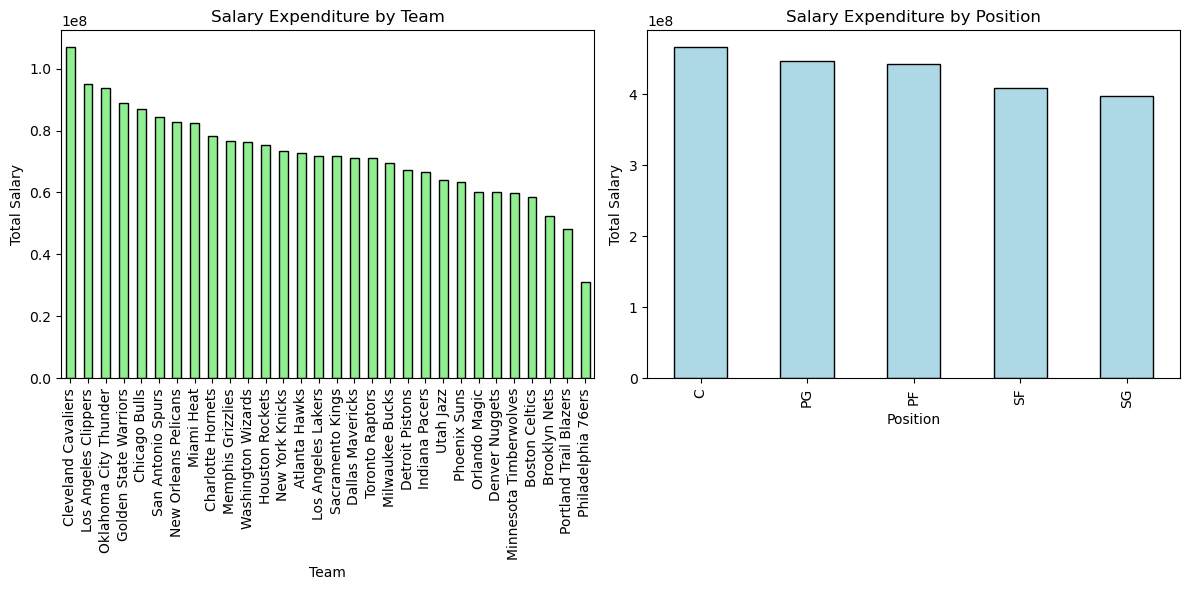

In [21]:
# Visualization:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
team_salary.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary')

plt.subplot(1, 2, 2)
position_salary.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary')

plt.tight_layout()
plt.show()

In [23]:
# to check correlation:
correlation = df[['Age', 'Salary']].corr()
print(correlation)

             Age    Salary
Age     1.000000  0.214009
Salary  0.214009  1.000000


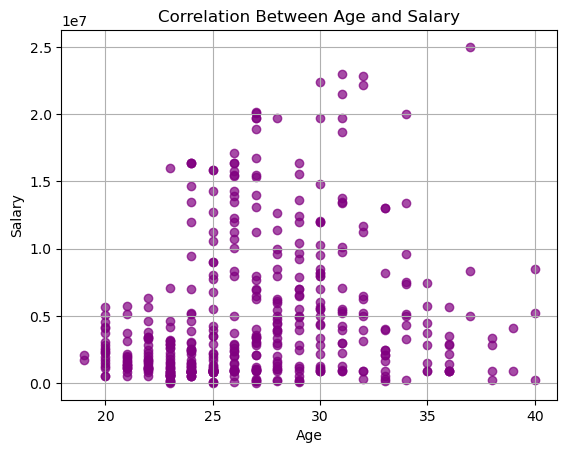

In [25]:
# Visualization:
plt.scatter(df['Age'], df['Salary'], alpha=0.7, color='purple')
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()